In [296]:
import pandas as pd

def loaddata():
    df=pd.read_csv("tweets.csv")
    df=df[:500]
    return df

In [297]:
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [298]:
df=loaddata()

df

/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/3408500295.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("tweets.csv")


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [299]:
def insights():
    print ("Rows     : " ,df.shape[0])
    print ("Columns  : " ,df.shape[1])
    print ("\nFeatures : \n" ,df.columns.tolist())
    print ("\nMissing values :  ", df.isnull().sum().values.sum())
    print ("\nUnique values :  \n",df.nunique())

In [300]:
insights()

Rows     :  500
Columns  :  12

Features : 
 ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']

Missing values :   276

Unique values :  
 user_name           392
text                496
user_location       234
user_description    372
user_created        392
user_followers      326
user_friends        343
user_favourites     344
user_verified         2
date                468
hashtags            213
source               57
dtype: int64


In [301]:
import matplotlib.pyplot as plt


<BarContainer object of 3 artists>

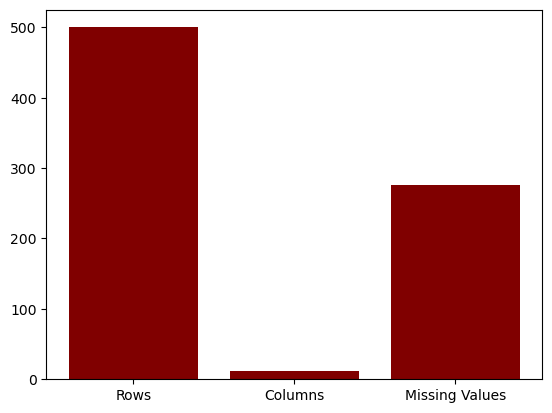

In [302]:
x=["Rows","Columns","Missing Values"]
y=[df.shape[0], df.shape[1], df.isnull().sum().values.sum()]
plt.bar(x, y, color ='maroon')

In [303]:
def remove_duplicate_row(df):
    df=df.drop_duplicates()
    return df

In [304]:
df=remove_duplicate_row(df)
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [305]:
def remove_missing_vals(df):
    df=df.dropna()
    return df

In [306]:
df=remove_missing_vals(df)
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,3028.0,483.0,1103,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,14.0,74.0,33,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [310]:
#normalise the values in the data
import pandas as pd
from sklearn import preprocessing

x = df.iloc[:,5:8] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)
df.iloc[:,5:8]=df1
df

/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/3599935738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,5:8]=df1


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.00048,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,0.001429,0.004292,0.003118,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,0.000006,0.000658,0.000093,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,0.007085,0.025556,0.000003,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,0.001633,0.00295,0.012618,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [311]:
x = df.iloc[:,5:8]
x

,user_followers,user_friends,user_favourites
2,0.000221,0.001395,0.014656
3,0.001823,0.016732,0.006826
4,0.000716,0.004496,0.000181
6,0.000083,0.00048,0.000774
7,0.000058,0.002657,0.025264
...,...,...,...
493,0.001429,0.004292,0.003118
494,0.000006,0.000658,0.000093
495,0.007085,0.025556,0.000003
497,0.001633,0.00295,0.012618


In [312]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.00048,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,0.001429,0.004292,0.003118,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App
494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,0.000006,0.000658,0.000093,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,0.007085,0.025556,0.000003,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,0.001633,0.00295,0.012618,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.


In [313]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)





def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
 

In [314]:
df["text"] = df["text"].astype(str)
df["text"] = [x.replace(':',' ') for x in df["text"]]

/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/2171315378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].astype(str)
/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/2171315378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = [x.replace(':',' ') for x in df["text"]]


In [315]:
from tqdm import tqdm
df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])
print(df['clean_text'])

100%|███████████████████████████████████████| 274/274 [00:00<00:00, 1451.46it/s]

2      get binanc spot recommend short ticker ghstusd...
3      video show compani logo base websit domain sho...
4      use cerberusgpt hologeneticslab simul hologene...
6      andr look chatgpt creat ad promot ai featur am...
7      sell binanc spot recommend short ticker farmbu...
                             ...                        
493                                                  NaN
494                                                  NaN
495                                                  NaN
497                                                  NaN
498                                                  NaN
Name: clean_text, Length: 274, dtype: object



/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/2594945454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])


In [316]:

df=df.dropna()
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,clean_text
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,get binanc spot recommend short ticker ghstusd...
3,Georgiana Comsa,New @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,video show compani logo base websit domain sho...
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,use cerberusgpt hologeneticslab simul hologene...
6,ScrapeLogo: acquired by RiteKit in 2015,Video Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.00048,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,andr look chatgpt creat ad promot ai featur am...
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,sell binanc spot recommend short ticker farmbu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,OpenMind,🤯🤔 Language models such as #ChatGPT that have ...,Knowledge is Global,OpenMind's goal is bringing you quality conten...,2011-06-28 09:03:40+00:00,0.007302,0.007926,0.008819,False,2023-05-17 17:00:05+00:00,['ChatGPT'],Salesforce - Social Studio,congress hold hear week discuss impact ai soci...
259,Prepping with Sarge,Since OpenAI is trending again…\n\n#Artificial...,"South Carolina, USA",YT channel; Prepping with Sarge #IFB 🇺🇸 #garde...,2015-08-20 21:04:21+00:00,0.008556,0.164824,0.075426,False,2023-05-17 17:00:05+00:00,"['ArtificialInteligence', 'OPENAI', 'ChatGPT']",Twitter for iPhone,gpt come know far forb ai chatgpt chatgpt http...
265,Alberta Dental Association,"Since the introduction of #ChatGPT, Artificial...","Alberta, Canada",The Alberta Dental Association (ADA) is the vo...,2017-09-13 20:49:16+00:00,0.000737,0.002497,0.000466,False,2023-05-17 16:59:36+00:00,['ChatGPT'],LaterMedia,got use googlebard say impress ui respons spee...
266,Codepaper,💡 The future of search isn't just about findin...,"Toronto, Ontario","Custom software development, AI Development, S...",2019-05-15 00:03:00+00:00,0.000122,0.016563,0.00011,False,2023-05-17 16:59:11+00:00,"['ChatGPT', 'AI']",Twitter Web App,think possibl book titl luna bridg heart build...


In [317]:
textli=[]
def remove_links(df):
    for text in df['clean_text']:
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        textli.append(text)
    return textli
    

In [318]:
removed_link_text=[]
removed_link_text=remove_links(df)
removed_link_text

['get binanc spot recommend short ticker ghstusdt time interv min last price  rsi  power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa',
 'video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx',
 'use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis system chatgpt base organ process even system subject secur breach like prompt inject https tcoaaoxdvqt',
 'andr look chatgpt creat ad promot ai featur amp alleniverson https tcowvdthuwml',
 'sell binanc spot recommend short ticker farmbusd time interv min last price  rsi  power chatgpt farm farm gon na long wait short https tcoaebrdtaxz',
 'timelin go wonki blame chatgpt https tcomnuyfveec',
 'time sell binanc spot recommend short ticker mlnusdt time interv min last price  rsi  power chatgpt mln mln ethereumclass gon na long wait short https tcofqdjdxrt',
 'chatgpt   ai mommi govern proper role least must indemn

In [319]:
df['ultra_clean'] = removed_link_text
df

/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/189455590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ultra_clean'] = removed_link_text


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,clean_text,ultra_clean
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,get binanc spot recommend short ticker ghstusd...,get binanc spot recommend short ticker ghstusd...
3,Georgiana Comsa,New @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,video show compani logo base websit domain sho...,video show compani logo base websit domain sho...
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,use cerberusgpt hologeneticslab simul hologene...,use cerberusgpt hologeneticslab simul hologene...
6,ScrapeLogo: acquired by RiteKit in 2015,Video Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.00048,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,andr look chatgpt creat ad promot ai featur am...,andr look chatgpt creat ad promot ai featur am...
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,sell binanc spot recommend short ticker farmbu...,sell binanc spot recommend short ticker farmbu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,OpenMind,🤯🤔 Language models such as #ChatGPT that have ...,Knowledge is Global,OpenMind's goal is bringing you quality conten...,2011-06-28 09:03:40+00:00,0.007302,0.007926,0.008819,False,2023-05-17 17:00:05+00:00,['ChatGPT'],Salesforce - Social Studio,congress hold hear week discuss impact ai soci...,congress hold hear week discuss impact ai soci...
259,Prepping with Sarge,Since OpenAI is trending again…\n\n#Artificial...,"South Carolina, USA",YT channel; Prepping with Sarge #IFB 🇺🇸 #garde...,2015-08-20 21:04:21+00:00,0.008556,0.164824,0.075426,False,2023-05-17 17:00:05+00:00,"['ArtificialInteligence', 'OPENAI', 'ChatGPT']",Twitter for iPhone,gpt come know far forb ai chatgpt chatgpt http...,gpt come know far forb ai chatgpt chatgpt http...
265,Alberta Dental Association,"Since the introduction of #ChatGPT, Artificial...","Alberta, Canada",The Alberta Dental Association (ADA) is the vo...,2017-09-13 20:49:16+00:00,0.000737,0.002497,0.000466,False,2023-05-17 16:59:36+00:00,['ChatGPT'],LaterMedia,got use googlebard say impress ui respons spee...,got use googlebard say impress ui respons spee...
266,Codepaper,💡 The future of search isn't just about findin...,"Toronto, Ontario","Custom software development, AI Development, S...",2019-05-15 00:03:00+00:00,0.000122,0.016563,0.00011,False,2023-05-17 16:59:11+00:00,"['ChatGPT', 'AI']",Twitter Web App,think possibl book titl luna bridg heart build...,think possibl book titl luna bridg heart build...


In [320]:
import nltk
from nltk.tokenize import word_tokenize

def bigram(df):
    bigramli=[]
    for text in df['ultra_clean']:
        tokens = nltk.word_tokenize(text)
        bigrm = nltk.bigrams(tokens)
        return(list(nltk.bigrams(bigrm)))
        #bigramli.append(bigram)
        
        


In [321]:
mylist=[]
mylist=bigram(df)

In [322]:
from collections import Counter
def bigram_count():
    bigram_counts = Counter()
    for cell in mylist:
        for bigram in cell:
            bigram_counts[bigram] += 1

    print(bigram_counts)

In [323]:
bigram_count()

Counter({('binanc', 'spot'): 2, ('spot', 'recommend'): 2, ('recommend', 'short'): 2, ('short', 'ticker'): 2, ('ticker', 'ghstusdt'): 2, ('ghstusdt', 'time'): 2, ('time', 'interv'): 2, ('interv', 'min'): 2, ('min', 'last'): 2, ('last', 'price'): 2, ('price', 'rsi'): 2, ('rsi', 'power'): 2, ('power', 'chatgpt'): 2, ('chatgpt', 'ghst'): 2, ('ghst', 'ghst'): 2, ('ghst', 'alphaquarktoken'): 2, ('alphaquarktoken', 'gon'): 2, ('gon', 'na'): 2, ('na', 'long'): 2, ('long', 'wait'): 2, ('wait', 'short'): 2, ('short', 'https'): 2, ('get', 'binanc'): 1, ('https', 'tcoqiqgttaa'): 1})


In [324]:
def trigram(df):
    bigramli=[]
    for text in df['ultra_clean']:
        tokens = nltk.word_tokenize(text)
        bigrm = nltk.trigrams(tokens)
        return(list(nltk.bigrams(bigrm)))

In [325]:
mylist2=[]
mylist2=trigram(df)

In [326]:

from collections import Counter
def trigram_count():
    trigram_counts = Counter()
    for cell in mylist2:
        for trigram in cell:
            trigram_counts[trigram] += 1

    print(trigram_counts)

In [327]:
trigram_count()

Counter({('binanc', 'spot', 'recommend'): 2, ('spot', 'recommend', 'short'): 2, ('recommend', 'short', 'ticker'): 2, ('short', 'ticker', 'ghstusdt'): 2, ('ticker', 'ghstusdt', 'time'): 2, ('ghstusdt', 'time', 'interv'): 2, ('time', 'interv', 'min'): 2, ('interv', 'min', 'last'): 2, ('min', 'last', 'price'): 2, ('last', 'price', 'rsi'): 2, ('price', 'rsi', 'power'): 2, ('rsi', 'power', 'chatgpt'): 2, ('power', 'chatgpt', 'ghst'): 2, ('chatgpt', 'ghst', 'ghst'): 2, ('ghst', 'ghst', 'alphaquarktoken'): 2, ('ghst', 'alphaquarktoken', 'gon'): 2, ('alphaquarktoken', 'gon', 'na'): 2, ('gon', 'na', 'long'): 2, ('na', 'long', 'wait'): 2, ('long', 'wait', 'short'): 2, ('wait', 'short', 'https'): 2, ('get', 'binanc', 'spot'): 1, ('short', 'https', 'tcoqiqgttaa'): 1})


In [328]:
from textblob import TextBlob

In [329]:
polarityli=[]
sentiment=[]
for text in df['ultra_clean']:
    data=TextBlob(text)
    #print(data.sentiment.polarity)
    if data.sentiment.polarity<0:
        print(text,"NEGATIVE")
    if data.sentiment.polarity>0:
        print(text,"POSITIVE")
    if data.sentiment.polarity==0:
        print(text,"NEUTRAL")
        
    


get binanc spot recommend short ticker ghstusdt time interv min last price  rsi  power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa NEGATIVE
video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx NEGATIVE
use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis system chatgpt base organ process even system subject secur breach like prompt inject https tcoaaoxdvqt NEGATIVE
andr look chatgpt creat ad promot ai featur amp alleniverson https tcowvdthuwml NEUTRAL
sell binanc spot recommend short ticker farmbusd time interv min last price  rsi  power chatgpt farm farm gon na long wait short https tcoaebrdtaxz NEGATIVE
timelin go wonki blame chatgpt https tcomnuyfveec NEUTRAL
time sell binanc spot recommend short ticker mlnusdt time interv min last price  rsi  power chatgpt mln mln ethereumclass gon na long wait short https tcofqdjdxrt NEGATIVE
chatgpt   ai mommi gover

In [330]:
data.sentiment.polarity

0.09523809523809523

In [331]:
polarityli=[]
textlist=[]
sentiment=[]
for text in df['ultra_clean']:
    data=TextBlob(text)
    textlist.append(text)
    #print(data.sentiment.polarity)
    if data.sentiment.polarity<0:
        sentiment.append("NEGATIVE")
    if data.sentiment.polarity>0:
        sentiment.append("POSITIVE")  
    if data.sentiment.polarity==0:
        sentiment.append("NEUTRAL")
        
        
    


In [332]:
print(sentiment)

['NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEGATIVE', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEUTRAL', 'NEUTRAL', 'NEGATIVE', 'NEUTRAL', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL

In [333]:
textlist

['get binanc spot recommend short ticker ghstusdt time interv min last price  rsi  power chatgpt ghst ghst alphaquarktoken gon na long wait short https tcoqiqgttaa',
 'video show compani logo base websit domain short https tcoswognqbea get companylogo api chatgpt https tcovslbwtatfx',
 'use cerberusgpt hologeneticslab simul hologenet digitalorgan supercomput creat intern revis system chatgpt base organ process even system subject secur breach like prompt inject https tcoaaoxdvqt',
 'andr look chatgpt creat ad promot ai featur amp alleniverson https tcowvdthuwml',
 'sell binanc spot recommend short ticker farmbusd time interv min last price  rsi  power chatgpt farm farm gon na long wait short https tcoaebrdtaxz',
 'timelin go wonki blame chatgpt https tcomnuyfveec',
 'time sell binanc spot recommend short ticker mlnusdt time interv min last price  rsi  power chatgpt mln mln ethereumclass gon na long wait short https tcofqdjdxrt',
 'chatgpt   ai mommi govern proper role least must indemn

In [334]:
df3 = pd.DataFrame(list(zip(textlist, sentiment)),
               columns =['Text', 'sentiment'])
df3

,Text,sentiment
0,get binanc spot recommend short ticker ghstusd...,NEGATIVE
1,video show compani logo base websit domain sho...,NEGATIVE
2,use cerberusgpt hologeneticslab simul hologene...,NEGATIVE
3,andr look chatgpt creat ad promot ai featur am...,NEUTRAL
4,sell binanc spot recommend short ticker farmbu...,NEGATIVE
...,...,...
144,congress hold hear week discuss impact ai soci...,POSITIVE
145,gpt come know far forb ai chatgpt chatgpt http...,POSITIVE
146,got use googlebard say impress ui respons spee...,POSITIVE
147,think possibl book titl luna bridg heart build...,NEUTRAL


In [335]:
#Wasnt able to do ROberta as it was taking too long to DOWNLOAD

In [374]:
counter = 0
length=[]
def len_sent(df):
    for text in df['ultra_clean']:
        length.append(len(text))
    return length

In [375]:
len_sente=[]
len_sente=len_sent(df)
len_sente

[161,
 115,
 195,
 79,
 147,
 49,
 162,
 173,
 89,
 231,
 60,
 184,
 98,
 203,
 159,
 116,
 162,
 162,
 134,
 100,
 122,
 163,
 112,
 118,
 118,
 173,
 50,
 66,
 79,
 125,
 142,
 162,
 171,
 123,
 41,
 110,
 199,
 86,
 171,
 81,
 144,
 215,
 142,
 147,
 159,
 200,
 86,
 144,
 201,
 34,
 113,
 80,
 87,
 105,
 191,
 94,
 129,
 195,
 136,
 41,
 154,
 76,
 165,
 173,
 94,
 107,
 54,
 216,
 85,
 70,
 86,
 51,
 48,
 225,
 146,
 42,
 102,
 117,
 156,
 75,
 186,
 189,
 112,
 189,
 78,
 129,
 70,
 94,
 64,
 111,
 152,
 108,
 55,
 182,
 41,
 67,
 83,
 243,
 186,
 128,
 232,
 77,
 103,
 70,
 95,
 137,
 83,
 64,
 96,
 176,
 203,
 116,
 140,
 104,
 190,
 101,
 105,
 198,
 77,
 69,
 76,
 88,
 178,
 185,
 38,
 200,
 208,
 46,
 218,
 91,
 128,
 167,
 171,
 171,
 157,
 170,
 187,
 114,
 140,
 118,
 231,
 230,
 216,
 169,
 161,
 61,
 150,
 88,
 156]

In [376]:
import numpy as np
df['length'] = len_sente

/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/1141271773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = len_sente


In [377]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,clean_text,ultra_clean,length,No of Words
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,get binanc spot recommend short ticker ghstusd...,get binanc spot recommend short ticker ghstusd...,161,25
3,Georgiana Comsa,New @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,video show compani logo base websit domain sho...,video show compani logo base websit domain sho...,115,16
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,use cerberusgpt hologeneticslab simul hologene...,use cerberusgpt hologeneticslab simul hologene...,195,25
6,ScrapeLogo: acquired by RiteKit in 2015,Video Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.00048,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,andr look chatgpt creat ad promot ai featur am...,andr look chatgpt creat ad promot ai featur am...,79,12
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,sell binanc spot recommend short ticker farmbu...,sell binanc spot recommend short ticker farmbu...,147,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,OpenMind,🤯🤔 Language models such as #ChatGPT that have ...,Knowledge is Global,OpenMind's goal is bringing you quality conten...,2011-06-28 09:03:40+00:00,0.007302,0.007926,0.008819,False,2023-05-17 17:00:05+00:00,['ChatGPT'],Salesforce - Social Studio,congress hold hear week discuss impact ai soci...,congress hold hear week discuss impact ai soci...,161,25
259,Prepping with Sarge,Since OpenAI is trending again…\n\n#Artificial...,"South Carolina, USA",YT channel; Prepping with Sarge #IFB 🇺🇸 #garde...,2015-08-20 21:04:21+00:00,0.008556,0.164824,0.075426,False,2023-05-17 17:00:05+00:00,"['ArtificialInteligence', 'OPENAI', 'ChatGPT']",Twitter for iPhone,gpt come know far forb ai chatgpt chatgpt http...,gpt come know far forb ai chatgpt chatgpt http...,61,10
265,Alberta Dental Association,"Since the introduction of #ChatGPT, Artificial...","Alberta, Canada",The Alberta Dental Association (ADA) is the vo...,2017-09-13 20:49:16+00:00,0.000737,0.002497,0.000466,False,2023-05-17 16:59:36+00:00,['ChatGPT'],LaterMedia,got use googlebard say impress ui respons spee...,got use googlebard say impress ui respons spee...,150,25
266,Codepaper,💡 The future of search isn't just about findin...,"Toronto, Ontario","Custom software development, AI Development, S...",2019-05-15 00:03:00+00:00,0.000122,0.016563,0.00011,False,2023-05-17 16:59:11+00:00,"['ChatGPT', 'AI']",Twitter Web App,think possibl book titl luna bridg heart build...,think possibl book titl luna bridg heart build...,88,13


In [366]:
countwords=[]
def CountWords(df):
    for text in df['ultra_clean']:
        countwords.append(len(text.split()))
    return(countwords)

In [367]:
CountWordList=[]
CountWordList=CountWords(df)
CountWordList

[25,
 16,
 25,
 12,
 24,
 7,
 26,
 24,
 12,
 29,
 11,
 29,
 15,
 27,
 26,
 14,
 24,
 20,
 14,
 14,
 17,
 24,
 15,
 18,
 18,
 27,
 8,
 9,
 11,
 18,
 24,
 26,
 25,
 20,
 6,
 14,
 26,
 13,
 25,
 11,
 23,
 30,
 20,
 25,
 27,
 28,
 12,
 22,
 28,
 5,
 17,
 13,
 14,
 18,
 28,
 14,
 17,
 27,
 21,
 6,
 24,
 10,
 22,
 23,
 14,
 16,
 8,
 32,
 12,
 11,
 12,
 6,
 7,
 29,
 22,
 7,
 14,
 18,
 26,
 10,
 26,
 24,
 18,
 28,
 14,
 18,
 12,
 16,
 12,
 14,
 25,
 13,
 9,
 21,
 7,
 11,
 13,
 24,
 27,
 18,
 31,
 10,
 14,
 10,
 12,
 13,
 15,
 10,
 14,
 26,
 31,
 18,
 17,
 13,
 27,
 13,
 14,
 23,
 12,
 12,
 10,
 13,
 27,
 24,
 5,
 23,
 32,
 6,
 27,
 12,
 18,
 24,
 27,
 25,
 21,
 19,
 25,
 18,
 21,
 17,
 32,
 32,
 28,
 26,
 25,
 10,
 25,
 13,
 23]

In [368]:
df['No of Words'] = CountWordList

/var/folders/kg/hyfydh454kv3m8kxfdv03b380000gn/T/ipykernel_1080/104618500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No of Words'] = CountWordList


In [369]:
df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,clean_text,ultra_clean,length,No of Words
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,get binanc spot recommend short ticker ghstusd...,get binanc spot recommend short ticker ghstusd...,None,25
3,Georgiana Comsa,New @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,video show compani logo base websit domain sho...,video show compani logo base websit domain sho...,None,16
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,use cerberusgpt hologeneticslab simul hologene...,use cerberusgpt hologeneticslab simul hologene...,None,25
6,ScrapeLogo: acquired by RiteKit in 2015,Video Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.00048,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,andr look chatgpt creat ad promot ai featur am...,andr look chatgpt creat ad promot ai featur am...,None,12
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,sell binanc spot recommend short ticker farmbu...,sell binanc spot recommend short ticker farmbu...,None,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,OpenMind,🤯🤔 Language models such as #ChatGPT that have ...,Knowledge is Global,OpenMind's goal is bringing you quality conten...,2011-06-28 09:03:40+00:00,0.007302,0.007926,0.008819,False,2023-05-17 17:00:05+00:00,['ChatGPT'],Salesforce - Social Studio,congress hold hear week discuss impact ai soci...,congress hold hear week discuss impact ai soci...,None,25
259,Prepping with Sarge,Since OpenAI is trending again…\n\n#Artificial...,"South Carolina, USA",YT channel; Prepping with Sarge #IFB 🇺🇸 #garde...,2015-08-20 21:04:21+00:00,0.008556,0.164824,0.075426,False,2023-05-17 17:00:05+00:00,"['ArtificialInteligence', 'OPENAI', 'ChatGPT']",Twitter for iPhone,gpt come know far forb ai chatgpt chatgpt http...,gpt come know far forb ai chatgpt chatgpt http...,None,10
265,Alberta Dental Association,"Since the introduction of #ChatGPT, Artificial...","Alberta, Canada",The Alberta Dental Association (ADA) is the vo...,2017-09-13 20:49:16+00:00,0.000737,0.002497,0.000466,False,2023-05-17 16:59:36+00:00,['ChatGPT'],LaterMedia,got use googlebard say impress ui respons spee...,got use googlebard say impress ui respons spee...,None,25
266,Codepaper,💡 The future of search isn't just about findin...,"Toronto, Ontario","Custom software development, AI Development, S...",2019-05-15 00:03:00+00:00,0.000122,0.016563,0.00011,False,2023-05-17 16:59:11+00:00,"['ChatGPT', 'AI']",Twitter Web App,think possibl book titl luna bridg heart build...,think possibl book titl luna bridg heart build...,None,13
